# Cancer Detection Using Deep Learning

## Dataset

I use the MRI Brain Cancer Detection Dataset, available at: 
[Kaggle Dataset](https://www.kaggle.com/datasets/hamzahabib47/brain-cancer-detection-mri-images/data)

In [179]:
# Importing Required Libraries
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [180]:
# Data Exploration 

root_dir = 'Dataset'

# Dictionary to store image count for each class
number_of_images = {}

# Count images in each class: 'tumor' and 'healthy'
for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_of_images.items()
# Output: dict_items([('healthy', 408), ('tumor', 392)])


dict_items([('healthy', 408), ('tumor', 392)])

## Split the dataset as follows:

- 70% for **Training**
- 15% for **Validation**
- 15% for **Testing**

In [181]:
def dataFolder(path, split):
    if not os.path.exists('./' + path):
        os.mkdir('./' + path)

        for dir in os.listdir(root_dir):
            os.makedirs('./' + path + '/' + dir)

            # Select a subset of images randomly, avoid last 5 to ensure flexibility
            for img in np.random.choice(
                a=os.listdir(os.path.join(root_dir, dir)),
                size=(math.floor(split * number_of_images[dir]) - 5),
                replace=False
            ):
                source = os.path.join(root_dir, dir, img)
                destination = os.path.join('./' + path, dir)
                shutil.copy(source, destination)
                os.remove(source)  # Remove from original location after copying
    else:
        print(f'{path} folder already exists')


In [182]:
dataFolder('train', 0.7)
dataFolder('val', 0.15)
dataFolder('test', 0.15)

train folder already exists
val folder already exists
test folder already exists


In [183]:
# Check how many images are left in the original folder after the split:

for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_of_images.items()

dict_items([('healthy', 408), ('tumor', 392)])

## Building the Convolutional Neural Network (CNN)

In [184]:
# Importing the relevant libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense


## Model Architecture Explanation:

- **Conv2D layers** extract spatial features.
- **MaxPooling** helps reduce overfitting and computation by downsampling.
- **Dropout** is used for regularization (helps prevent overfitting).
- **Flatten** converts 2D feature maps into 1D for fully connected layers.
- **Dense layers** perform final classification.

In [185]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))  # Retains 75% of the data

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

- Since we're classifying MRI images as either cancerous or non-cancerous (binary classification), we use binary cross-entropy as the loss function.

In [186]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Data Preprocessing Using ImageDataGenerator

- We will now prepare the image datasets for training and evaluation using Keras’ **ImageDataGenerator**.

## For Training Data

- Here, we augment the training images to help the model generalize better by applying random transformations like zoom, shear, and horizontal flip. This increases the diversity of training samples.

In [187]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

def load_training_data(path):
    """
    Preprocess and augment training images.
    """
    train_datagen = ImageDataGenerator(
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        preprocessing_function=preprocess_input
    )
    return train_datagen.flow_from_directory(
        directory=path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

train_path = 'train'
train_data = load_training_data(train_path)



Found 549 images belonging to 2 classes.


In [188]:
print(train_data.class_indices)

{'healthy': 0, 'tumor': 1}


## For Validation and Test Data
- Unlike training data, we don’t apply augmentation to validation or test data. These datasets should reflect real-world scenarios without synthetic transformations.

In [189]:
def load_test_or_val_data(path):
    """
    Preprocess validation or test images without augmentation.
    """
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    return test_datagen.flow_from_directory(
        directory=path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

In [190]:
test_path = 'test'
val_path = 'val'

test_data = load_test_or_val_data(test_path)
val_data = load_test_or_val_data(val_path)


Found 109 images belonging to 2 classes.
Found 109 images belonging to 2 classes.


## Early Stopping & Model Checkpointing (Optional)
- To avoid overfitting and save the best version of our model during training:

In [191]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Stop training if validation accuracy doesn't improve after 6 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1)

# Save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(filepath='./bestmodel.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

callbacks = [early_stopping, model_checkpoint]


In [192]:
# call back

mc = ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)
cb = [mc, es]

## Model training (Built from Scratch)

In [193]:
from tensorflow.keras.optimizers import Adam  

# Re-instantiate the optimizer
optimizer = Adam(learning_rate=0.001)

# Recompile the model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

hs = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=cb # includes ModelCheckpoint and EarlyStopping
)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.4346 - loss: 0.8870
Epoch 1: val_accuracy improved from None to 0.77982, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.5483 - loss: 0.7527 - val_accuracy: 0.7798 - val_loss: 0.4979
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.7123 - loss: 0.6351
Epoch 2: val_accuracy improved from 0.77982 to 0.85321, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 0.7395 - loss: 0.6039 - val_accuracy: 0.8532 - val_loss: 0.4820
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8208 - loss: 0.4785
Epoch 3: val_accuracy did not improve from 0.85321
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.8124 - loss: 0.4539 - val_accuracy: 0.7431 - val_loss: 0.4478
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.7926 - loss: 0.4037
Epoch 4: val_accuracy improved from 0.85321 to 0.90826, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.8215 - loss: 0.3804 - val_accuracy: 0.9083 - val_loss: 0.2833
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8675 - loss: 0.3361
Epoch 5: val_accuracy did not improve from 0.90826
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.8707 - loss: 0.3286 - val_accuracy: 0.8349 - val_loss: 0.3190
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.8677 - loss: 0.2974
Epoch 6: val_accuracy improved from 0.90826 to 0.92661, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.8798 - loss: 0.2725 - val_accuracy: 0.9266 - val_loss: 0.2279
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9173 - loss: 0.2195
Epoch 7: val_accuracy did not improve from 0.92661
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.9089 - loss: 0.2235 - val_accuracy: 0.8991 - val_loss: 0.2657
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8905 - loss: 0.2734
Epoch 8: val_accuracy did not improve from 0.92661
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.8780 - loss: 0.2939 - val_accuracy: 0.9266 - val_loss: 0.2050
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9251 - loss: 0.2393
Epoch 9: val_accuracy did not improve from 0.92661
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.9162 - loss: 0.2355 - val_accuracy: 0.9083 - val_loss: 0.2260
Epoch 9: early stopping


## 📊 Training & Validation Accuracy Plot

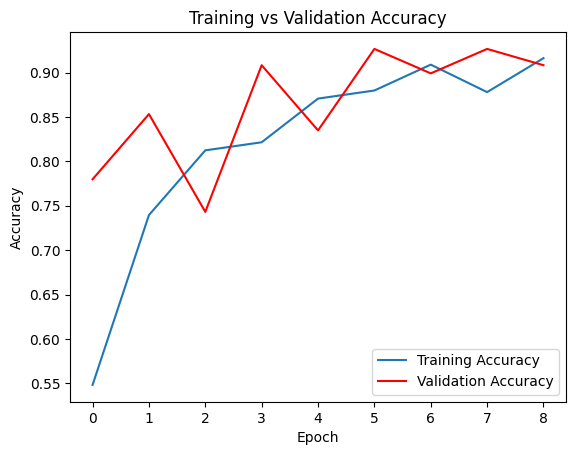

In [194]:
h = hs.history

plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy', c='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 📉 Training & Validation Loss Plot

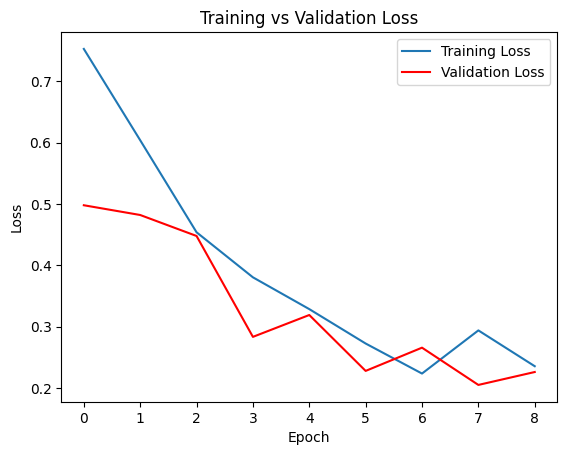

In [195]:
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss', c='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 🔎 Interpretation
- Training loss decreases well.
- Validation loss shows fluctuations, hinting at:
    - Data variability
    - Lack of regularization
    - Noisy dataset

In [196]:
# Model Evaluation on Test Data

from keras.models import load_model
model = load_model('bestmodel.h5') # load best saved model

acc = model.evaluate(test_data)[1]  # get accuracy # get accuracy
print(f'The accuracy of our model is {acc * 100:.2f} %')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9174 - loss: 0.2301
The accuracy of our model is 91.74 %


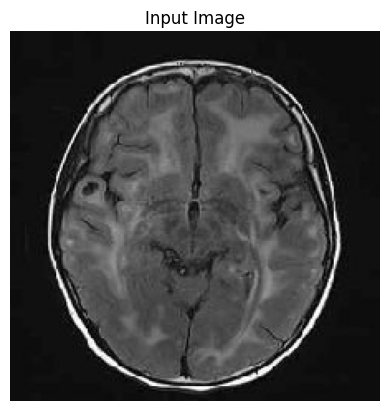

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
✅ The MRI image is of a healthy brain.


In [197]:
# checking if our model tells if a given image is cancerous or not

from tensorflow.keras.utils import load_img, img_to_array

# Load and preprocess image
img_path = 'Dataset/healthy/healthy (13).jpg'
img = load_img(img_path, target_size=(224, 224))
input_arr = img_to_array(img)
input_arr = preprocess_input(input_arr)
input_arr = np.expand_dims(input_arr, axis=0)

# Show the image
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

# Predict
pred = model.predict(input_arr)
class_label = (pred > 0.5).astype("int")[0][0]

# Result
if class_label == 0:
    print("✅ The MRI image is of a healthy brain.")
else:
    print("⚠️ The MRI image shows a brain tumor.")

## Model Training Using Transfer Learning
- We now use MobileNet, a lightweight pre-trained CNN, as our base model to extract features. Then, we add our custom layers on top to perform classification on MRI brain scans.

In [198]:
from keras.models import Model
from keras.layers import Flatten, Dense

# Load MobileNet base model without the final classification layers
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)

# Freeze all the layers so their weights aren't updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
output_layer = Dense(units=1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)
model.summary()

Model: "functional_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

##  Model Compilation & Training with Transfer Learning

In [199]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

- Optimizer: RMSprop works well with image classification.
- Loss Function: Binary crossentropy is appropriate since this is a binary classification (healthy or tumor).
- Metric: Accuracy measures how often predictions match labels.

In [200]:
# 🚀 Model Training

hist = model.fit(train_data,
                 steps_per_epoch=len(train_data),
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=len(val_data), 
                 callbacks=cb)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6928 - loss: 4.5289
Epoch 1: val_accuracy did not improve from 0.92661
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - accuracy: 0.7942 - loss: 2.4300 - val_accuracy: 0.6606 - val_loss: 3.6972
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9302 - loss: 0.7705
Epoch 2: val_accuracy improved from 0.92661 to 0.99083, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.9545 - loss: 0.3903 - val_accuracy: 0.9908 - val_loss: 0.0070
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9513 - loss: 0.3953
Epoch 3: val_accuracy improved from 0.99083 to 1.00000, saving model to bestmodel.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.9107 - loss: 0.8615 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9745 - loss: 0.1804
Epoch 4: val_accuracy did not improve from 1.00000
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.9745 - loss: 0.1617 - val_accuracy: 1.0000 - val_loss: 4.3755e-04
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9545 - loss: 0.3074
Epoch 5: val_accuracy did not improve from 1.00000
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.9308 - loss: 0.5416 - val_accuracy: 1.0000 - val_loss: 1.3235e-04
Epoch 5: early stopping


- **Epoch 1 Accuracy:** 69.28% (val)
- **Best Validation Accuracy:** 97.24%
- **Early Stopping** triggered at epoch 5 — model is performing well early due to transfer learning.

In [201]:
# 📈 Model Performance

model = load_model('bestmodel.h5')
acc = model.evaluate(test_data)[1]
print(f'our model accuracy is {acc * 100} %')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9725 - loss: 0.1283
our model accuracy is 97.24770784378052 %


- **Test Accuracy:** 97.24% — confirms generalization.
- **Improvement:** From 91% (scratch model) ➜ 97% (transfer learning)

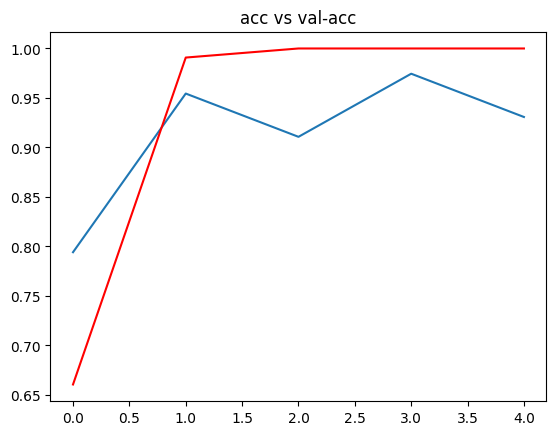

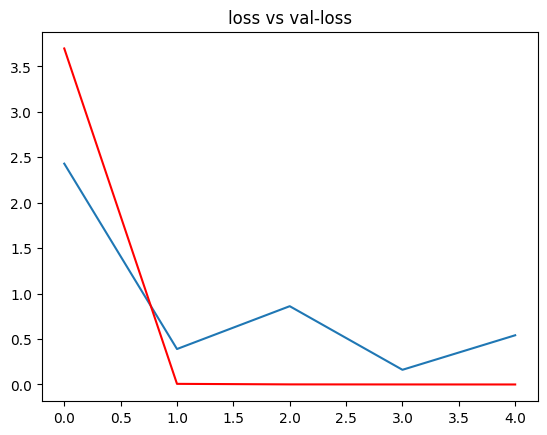

In [202]:
h = hist.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs val-acc')
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs val-loss')
plt.show()

- Training Accuracy: Increases rapidly.
- Validation Accuracy: High from start.

- Loss Curve:

    - Training loss → decreases steadily.
    - Validation loss → peaks early then drops.

- 📌 Interpretation:

- Model learns fast (thanks to MobileNet).
- Validation curves show mild overfitting, but generalization is still strong.

## 🧪 Making Predictions

In [203]:
from tensorflow.keras.utils import load_img, img_to_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
The MRI image is of a healthy brain


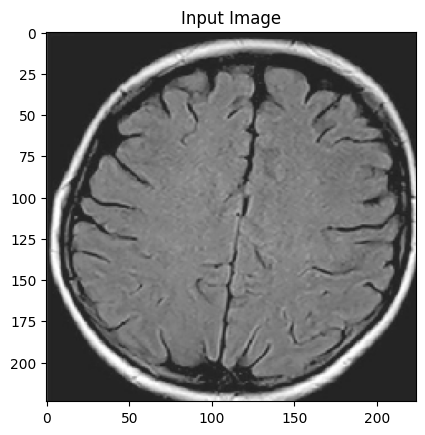

In [204]:
path = 'Dataset/healthy/healthy (50).jpg'

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img)/255  # Normalize
input_arr = np.expand_dims(input_arr, axis=0)  # Model expects batch format

pred = model.predict(input_arr)
class_label = (pred[0][0] > 0.5).astype("int")

if class_label == 0:
    print('The MRI image is of a healthy brain')
else:
    print('The MRI image is of a brain tumor')

# Display the input image
plt.imshow(img)
plt.title('Input Image')
plt.show()